## **Installation**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

## **Data Import**

In [2]:
# Create a DataFrame from CSV data
df = pd.read_csv("strokes.csv")

## **Avg Score for each Hole for each Round**

In [3]:
shot_1 = df.loc[df['shot'] == 1]
avg_round = shot_1.groupby(['player_id', 'round','hole']).agg({'hole_score': 'sum'}).reset_index()
sg_calc = avg_round.groupby(['hole','round'])['hole_score'].mean().reset_index()
sg_calc.rename(columns={'hole_score': 'avg_hole_score_per_round'}, inplace=True)
sg_calc

,hole,round,avg_hole_score_per_round
0,1,1,3.833333
1,1,2,4.033333
2,1,3,4.166667
3,1,4,4.000000
4,2,1,3.066667
...,...,...,...
67,17,4,4.300000
68,18,1,2.900000
69,18,2,3.066667
70,18,3,3.166667


In [4]:
selected_columns = ['player_id', 'last_name', 'round','hole','hole_score','par_value','yardage', 'shot', 'shot_type', 'num_of_strokes',
       'from_location_scorer', 'from_location_laser', 'to_location_scorer',
       'to_location_laser', 'distance', 'distance_to_pin', 'in_the_hole',
       'around_the_green', 'first_putt', 'dist_to_hole_after_shot', 'time',
       'lie', 'elevation', 'slope', 'x', 'y', 'z', 'dist_from_center',
       'dist_from_edge']  # Add the column names you want to select
condensed_df = shot_1[selected_columns].copy()
condensed_df

,player_id,last_name,round,hole,hole_score,par_value,yardage,shot,shot_type,num_of_strokes,...,dist_to_hole_after_shot,time,lie,elevation,slope,x,y,z,dist_from_center,dist_from_edge
0,1810,Mickelson,1,1,4,4,424,1,S,1,...,4788,1255,Good,With,Level,"9,093.97","9,859.90",480.316,562,126
4,1810,Mickelson,1,2,2,3,214,1,S,1,...,231,1307,Good,With,Level,"9,211.50","10,024.61",490.756,214,347
6,1810,Mickelson,1,3,4,4,387,1,S,1,...,3440,1315,Good,With,Level,"8,447.83","10,051.84",507.876,127,344
10,1810,Mickelson,1,4,4,4,440,1,S,1,...,5727,1326,Good,With,Level,"8,174.51","9,313.66",514.103,550,278
14,1810,Mickelson,1,5,5,4,520,1,S,1,...,9062,1338,Good,With,Level,"8,962.09","8,539.50",506.913,1210,793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8403,33141,Bradley,4,14,3,4,442,1,S,1,...,4695,1530,Good,With,Level,"11,327.13","9,337.86",508.390,386,47
8406,33141,Bradley,4,15,4,5,525,1,S,1,...,7275,1542,Good,With,Level,"11,623.85","8,969.57",508.009,158,254
8410,33141,Bradley,4,16,4,4,481,1,S,1,...,6993,1558,Good,With,Level,"11,329.40","8,533.72",499.617,326,14
8414,33141,Bradley,4,17,5,4,470,1,S,1,...,5558,1613,Good,With,Level,"10,661.04","9,194.21",480.149,704,266


## **SG for each Hole for each Round for every Player**

In [5]:
# Assuming sg_calc and condensed_df are your DataFrames
condensed_df['sg_per_hole_per_round_per_player'] = condensed_df.apply(
    lambda row: sg_calc.loc[(sg_calc['round'] == row['round']) & (sg_calc['hole'] == row['hole']), 'avg_hole_score_per_round'].iloc[0] - row['hole_score'],
    axis=1
)

condensed_df['avg_hole_score_per_round'] = condensed_df.apply(
    lambda row: sg_calc.loc[(sg_calc['round'] == row['round']) & (sg_calc['hole'] == row['hole']), 'avg_hole_score_per_round'].iloc[0],
    axis=1
)

# Display the resulting DataFrame
condensed_df

,player_id,last_name,round,hole,hole_score,par_value,yardage,shot,shot_type,num_of_strokes,...,lie,elevation,slope,x,y,z,dist_from_center,dist_from_edge,sg_per_hole_per_round_per_player,avg_hole_score_per_round
0,1810,Mickelson,1,1,4,4,424,1,S,1,...,Good,With,Level,"9,093.97","9,859.90",480.316,562,126,-0.166667,3.833333
4,1810,Mickelson,1,2,2,3,214,1,S,1,...,Good,With,Level,"9,211.50","10,024.61",490.756,214,347,1.066667,3.066667
6,1810,Mickelson,1,3,4,4,387,1,S,1,...,Good,With,Level,"8,447.83","10,051.84",507.876,127,344,-0.033333,3.966667
10,1810,Mickelson,1,4,4,4,440,1,S,1,...,Good,With,Level,"8,174.51","9,313.66",514.103,550,278,-0.233333,3.766667
14,1810,Mickelson,1,5,5,4,520,1,S,1,...,Good,With,Level,"8,962.09","8,539.50",506.913,1210,793,-0.766667,4.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8403,33141,Bradley,4,14,3,4,442,1,S,1,...,Good,With,Level,"11,327.13","9,337.86",508.390,386,47,0.766667,3.766667
8406,33141,Bradley,4,15,4,5,525,1,S,1,...,Good,With,Level,"11,623.85","8,969.57",508.009,158,254,0.366667,4.366667
8410,33141,Bradley,4,16,4,4,481,1,S,1,...,Good,With,Level,"11,329.40","8,533.72",499.617,326,14,0.166667,4.166667
8414,33141,Bradley,4,17,5,4,470,1,S,1,...,Good,With,Level,"10,661.04","9,194.21",480.149,704,266,-0.700000,4.300000


# **Rolling SG by Round by Hole by Player**

In [6]:
condensed_df = condensed_df.sort_values(by=['player_id', 'round', 'hole'])

# Calculate the rolling sum for each 'player_id'
condensed_df['rolling_sum_sg_per_hole_per_round_per_player'] = condensed_df.groupby('player_id')['sg_per_hole_per_round_per_player'].rolling(window=72, min_periods=1).sum().reset_index(level=0, drop=True)

# Create a new column 'round_hole_combination' with a numeric value representing the combination of 'round' and 'hole'
condensed_df['round_hole_combination'] = (condensed_df['round'] - 1) * 18 + condensed_df['hole']
# Now condensed_df contains a new column 'round_hole_combination' representing the combination of 'round' and 'hole' as a numeric value ranging from 1 to 72.

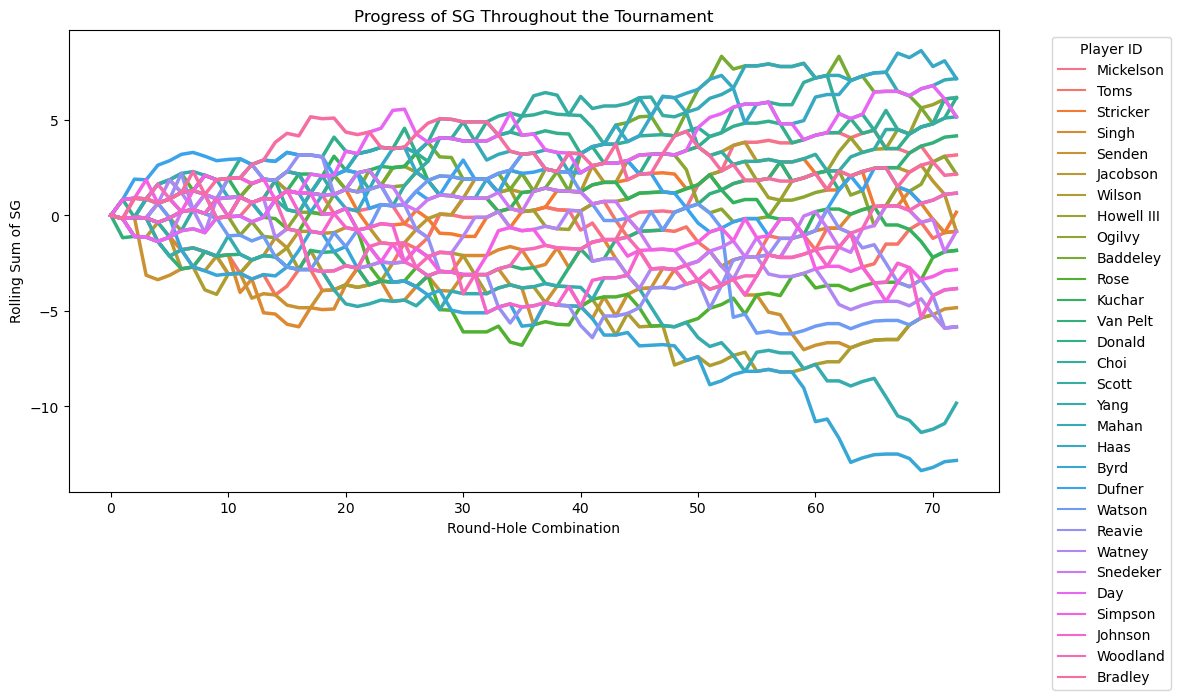

In [7]:
original_df = condensed_df[['last_name', 'round_hole_combination', 'sg_per_hole_per_round_per_player', 'rolling_sum_sg_per_hole_per_round_per_player']]

# Create a new DataFrame with additional rows
extra_rows = pd.DataFrame(columns=original_df.columns)

# Iterate through unique player_ids and add rows with specified conditions
for player_id in original_df['last_name'].unique():
    extra_row = pd.DataFrame({'last_name': [player_id], 'round_hole_combination': [0], 'sg_per_hole_per_round_per_player': [0], 'rolling_sum_sg_per_hole_per_round_per_player': [0]})
    extra_rows = pd.concat([extra_rows, extra_row], ignore_index=True)

# Concatenate the original DataFrame and the new rows
new_df = pd.concat([original_df, extra_rows], ignore_index=True)


palette = sns.color_palette("husl", n_colors=len(new_df['last_name'].unique()))

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=new_df, x='round_hole_combination', y='rolling_sum_sg_per_hole_per_round_per_player', hue='last_name', palette=palette, linewidth=2.5)

# Set labels and title
plt.xlabel('Round-Hole Combination')
plt.ylabel('Rolling Sum of SG')
plt.title('Progress of SG Throughout 2011 TOUR Championship')

# Customize the legend to show more players
plt.legend(title='Player ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

# **Normal Distributions for each Hole for each Round**

In [8]:
list_of_lists_sg_per_hole_per_round_per_players = []
results_list = []

for round_num in range(1, 5):  # Assuming rounds range from 1 to 4
    for hole_num in range(1, 19):  # Assuming holes range from 1 to 18
        list_of_sg_per_hole_per_round_per_players = condensed_df[
            (condensed_df['round'] == round_num) & (condensed_df['hole'] == hole_num)
        ]['sg_per_hole_per_round_per_player'].values.tolist()
        
        params = stats.norm.fit(list_of_sg_per_hole_per_round_per_players)
        
        result_dict = {
            'round': round_num,
            'hole': hole_num,
            'mean': params[0],
            'std': params[1]
        }

        results_list.append(result_dict)

        # print(f"Round {round_num}, Hole {hole_num}:")
        # print("Fitted Mean:", params[0])
        # print("Fitted Standard Deviation:", params[1])

# Now results_list contains dictionaries for each combination of round and hole with mean and std.


In [9]:
df_results = pd.DataFrame(results_list)
df_results

,round,hole,mean,std
0,1,1,1.480297e-16,0.453382
1,1,2,2.072416e-16,0.573488
2,1,3,1.184238e-16,0.657436
3,1,4,-5.921189e-17,0.615540
4,1,5,5.921189e-17,0.495536
...,...,...,...,...
67,4,14,-5.921189e-17,0.495536
68,4,15,-4.144833e-16,0.706321
69,4,16,2.960595e-16,0.636832
70,4,17,-1.776357e-16,0.690411


In [10]:
hole_stats = df_results.groupby('hole').agg({'mean': ['min', 'max'], 'std': ['min', 'max']})

# Rename the columns for clarity
hole_stats.columns = ['min_mean', 'max_mean', 'min_std', 'max_std']

# Merge hole_stats back to df_results on 'hole'
df_results = pd.merge(df_results, hole_stats, on='hole')
df_results

,round,hole,mean,std,min_mean,max_mean,min_std,max_std
0,1,1,1.480297e-16,0.453382,-1.184238e-16,2.960595e-16,0.453382,0.752034
1,2,1,-1.184238e-16,0.752034,-1.184238e-16,2.960595e-16,0.453382,0.752034
2,3,1,2.960595e-16,0.582142,-1.184238e-16,2.960595e-16,0.453382,0.752034
3,4,1,0.000000e+00,0.577350,-1.184238e-16,2.960595e-16,0.453382,0.752034
4,1,2,2.072416e-16,0.573488,-5.921189e-17,2.072416e-16,0.339935,0.573488
...,...,...,...,...,...,...,...,...
67,4,17,-1.776357e-16,0.690411,-2.960595e-16,1.480297e-16,0.582142,1.043498
68,1,18,-8.881784e-17,0.538516,-1.480297e-16,2.072416e-16,0.538516,0.636832
69,2,18,2.072416e-16,0.573488,-1.480297e-16,2.072416e-16,0.538516,0.636832
70,3,18,-1.480297e-16,0.636832,-1.480297e-16,2.072416e-16,0.538516,0.636832


# join SG here!

In [20]:
df_results['mean_diff'] = df_results['max_mean'] - df_results['min_mean']
df_results['std_diff'] = df_results['max_std'] - df_results['min_std']

# mean of means is easiest hole by 4 fits for each round?

df_results

,round,hole,mean,std,min_mean,max_mean,min_std,max_std,mean_diff,std_diff
0,1,1,1.480297e-16,0.453382,-1.184238e-16,2.960595e-16,0.453382,0.752034,4.144833e-16,0.298652
1,2,1,-1.184238e-16,0.752034,-1.184238e-16,2.960595e-16,0.453382,0.752034,4.144833e-16,0.298652
2,3,1,2.960595e-16,0.582142,-1.184238e-16,2.960595e-16,0.453382,0.752034,4.144833e-16,0.298652
3,4,1,0.000000e+00,0.577350,-1.184238e-16,2.960595e-16,0.453382,0.752034,4.144833e-16,0.298652
4,1,2,2.072416e-16,0.573488,-5.921189e-17,2.072416e-16,0.339935,0.573488,2.664535e-16,0.233554
...,...,...,...,...,...,...,...,...,...,...
67,4,17,-1.776357e-16,0.690411,-2.960595e-16,1.480297e-16,0.582142,1.043498,4.440892e-16,0.461357
68,1,18,-8.881784e-17,0.538516,-1.480297e-16,2.072416e-16,0.538516,0.636832,3.552714e-16,0.098316
69,2,18,2.072416e-16,0.573488,-1.480297e-16,2.072416e-16,0.538516,0.636832,3.552714e-16,0.098316
70,3,18,-1.480297e-16,0.636832,-1.480297e-16,2.072416e-16,0.538516,0.636832,3.552714e-16,0.098316


In [21]:
#most var for any hole of any round
df_temp = df_results.sort_values(by='std', ascending=False)
df_temp

,round,hole,mean,std,min_mean,max_mean,min_std,max_std,mean_diff,std_diff
66,3,17,-2.960595e-16,1.043498,-2.960595e-16,1.480297e-16,0.582142,1.043498,4.440892e-16,0.461357
64,1,17,0.000000e+00,0.856349,-2.960595e-16,1.480297e-16,0.582142,1.043498,4.440892e-16,0.461357
37,2,10,5.921189e-17,0.803465,-2.368476e-16,5.921189e-17,0.573488,0.803465,2.960595e-16,0.229976
13,2,4,4.144833e-16,0.763035,-5.921189e-17,4.144833e-16,0.516398,0.763035,4.736952e-16,0.246637
1,2,1,-1.184238e-16,0.752034,-1.184238e-16,2.960595e-16,0.453382,0.752034,4.144833e-16,0.298652
...,...,...,...,...,...,...,...,...,...,...
48,1,13,5.921189e-17,0.495536,0.000000e+00,5.921189e-17,0.447214,0.632456,5.921189e-17,0.185242
0,1,1,1.480297e-16,0.453382,-1.184238e-16,2.960595e-16,0.453382,0.752034,4.144833e-16,0.298652
49,2,13,0.000000e+00,0.447214,0.000000e+00,5.921189e-17,0.447214,0.632456,5.921189e-17,0.185242
6,3,2,2.960595e-17,0.339935,-5.921189e-17,2.072416e-16,0.339935,0.573488,2.664535e-16,0.233554


In [22]:
#hardest hole of any round
df_results.sort_values(by='mean', ascending=True)

,round,hole,mean,std,min_mean,max_mean,min_std,max_std,mean_diff,std_diff
59,4,15,-4.144833e-16,0.706321,-4.144833e-16,1.184238e-16,0.585947,0.706321,5.329071e-16,0.120374
18,3,5,-4.144833e-16,0.752034,-4.144833e-16,2.960595e-16,0.495536,0.752034,7.105427e-16,0.256499
24,1,7,-3.552714e-16,0.597216,-3.552714e-16,4.144833e-16,0.516398,0.597216,7.697546e-16,0.080818
66,3,17,-2.960595e-16,1.043498,-2.960595e-16,1.480297e-16,0.582142,1.043498,4.440892e-16,0.461357
33,2,9,-2.368476e-16,0.558768,-2.368476e-16,5.921189e-17,0.558768,0.628932,2.960595e-16,0.070164
...,...,...,...,...,...,...,...,...,...,...
19,4,5,2.960595e-16,0.521749,-4.144833e-16,2.960595e-16,0.495536,0.752034,7.105427e-16,0.256499
2,3,1,2.960595e-16,0.582142,-1.184238e-16,2.960595e-16,0.453382,0.752034,4.144833e-16,0.298652
30,3,8,4.144833e-16,0.718022,-1.776357e-16,4.144833e-16,0.600000,0.737111,5.921189e-16,0.137111
27,4,7,4.144833e-16,0.561743,-3.552714e-16,4.144833e-16,0.516398,0.597216,7.697546e-16,0.080818


In [23]:
#std biggest change in variance HOLE 17
df_temp = df_temp.drop_duplicates(subset='std_diff', keep='first')
#ignore rounds here lol

,round,hole,mean,std,min_mean,max_mean,min_std,max_std,mean_diff,std_diff
67,4,17,-1.776357e-16,0.690411,-2.960595e-16,1.480297e-16,0.582142,1.043498,4.440892e-16,0.461357
40,1,11,-1.184238e-16,0.657436,-1.480297e-16,1.184238e-16,0.314466,0.687184,2.664535e-16,0.372718
0,1,1,1.480297e-16,0.453382,-1.184238e-16,2.960595e-16,0.453382,0.752034,4.144833e-16,0.298652
16,1,5,5.921189e-17,0.495536,-4.144833e-16,2.960595e-16,0.495536,0.752034,7.105427e-16,0.256499
13,2,4,4.144833e-16,0.763035,-5.921189e-17,4.144833e-16,0.516398,0.763035,4.736952e-16,0.246637
7,4,2,8.881784e-17,0.538516,-5.921189e-17,2.072416e-16,0.339935,0.573488,2.664535e-16,0.233554
39,4,10,5.921189e-17,0.615540,-2.368476e-16,5.921189e-17,0.573488,0.803465,2.960595e-16,0.229976
55,4,14,-5.921189e-17,0.495536,-2.072416e-16,1.776357e-16,0.495536,0.702377,3.848773e-16,0.206841
50,3,13,5.921189e-17,0.495536,0.000000e+00,5.921189e-17,0.447214,0.632456,5.921189e-17,0.185242
11,4,3,2.960595e-17,0.498888,2.960595e-17,1.184238e-16,0.498888,0.657436,8.881784e-17,0.158548


In [ ]:
df_temp.sort_values(by='std_diff', ascending=False)


In [ ]:
#add means, stds, difdss to condensed_df

In [16]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Set the parameters of the normal distribution

# Generate synthetic data from the normal distribution

# Fit the normal distribution to the synthetic data
params = norm.fit(list_of_sg_per_hole_per_round_per_players)



print("Fitted Mean:", params[0])
print("Fitted Standard Deviation:", params[1])

Fitted Mean: 2.0724163126336256e-16
Fitted Standard Deviation: 0.5734883511361751


In [17]:
^ ok now do thus for every hole in everyround, then look at which holes had the highest fluxation in variance by subtracting the min and max variance for eeach round of each hole, guessing most variance be be on a tough pin placement on a par three that could depend on wind

then split inot back and front nine preformance for each day

SyntaxError: invalid syntax (224486229.py, line 1)